In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Model

In [3]:
! ls

Normal-3172.png      Training_Images.png  Untitled.ipynb
Opening Slide.jpg    Tuberculosis-644.png


In [4]:
! ls ../

Images                                  environment.yml
Notebooks                               model.05-0.17.h5
README.md                               model.06-0.18.h5
TB_Chest_Radiography_Database           model.07-0.52.h5
Tuberculosis-X-ray-Classification.ipynb


In [5]:
!ls ../TB_Chest_Radiography_Database

Data_split


In [6]:
!ls ../TB_Chest_Radiography_Database/Data_split

Test       Train      Validation


In [7]:
# Instantiating a generator object and normalizing the RGB values
traingen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testgen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = traingen.flow_from_directory(
    directory='../TB_Chest_Radiography_Database/Data_split/Train',
    target_size=(512, 512),
    class_mode='binary',
    batch_size=20,
    seed=42
)

val_data = testgen.flow_from_directory(
    directory='../TB_Chest_Radiography_Database/Data_split/Validation',
    target_size=(512, 512),
    class_mode='binary',
    batch_size=20,
    seed=42
)

test_data = valgen.flow_from_directory(
    directory='../TB_Chest_Radiography_Database/Data_split/Test',
    target_size=(512, 512),
    class_mode='binary',
    batch_size=20,
    seed=42
)

Found 2940 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


In [9]:
input_shape = (512,512,3)

In [10]:
# Setting up a 1st of iteration baseline MLP
baseline2 = keras.Sequential(
    [
        keras.Input(shape=(input_shape)), 
        keras.layers.Flatten(), 
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ])

baseline2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 786432)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               78643300  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 78,643,401
Trainable params: 78,643,401
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling
baseline2.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['acc', 'Recall', 'Precision',  'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [18]:
#Fitting
baseline2_results = baseline2.fit_generator(train_data,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=val_data)

Epoch 1/10
100/100 [==============================] - 61s 613ms/step - loss: 0.2468 - acc: 0.9500 - recall: 0.8678 - precision: 0.8483 - true_positives: 302.0000 - true_negatives: 1598.0000 - false_positives: 54.0000 - false_negatives: 46.0000 - val_loss: 0.3273 - val_acc: 0.9202 - val_recall: 0.5357 - val_precision: 0.9740 - val_true_positives: 75.0000 - val_true_negatives: 698.0000 - val_false_positives: 2.0000 - val_false_negatives: 65.0000
Epoch 2/10
100/100 [==============================] - 60s 596ms/step - loss: 0.1512 - acc: 0.9530 - recall: 0.8287 - precision: 0.8770 - true_positives: 271.0000 - true_negatives: 1635.0000 - false_positives: 38.0000 - false_negatives: 56.0000 - val_loss: 0.2078 - val_acc: 0.9417 - val_recall: 0.8071 - val_precision: 0.8370 - val_true_positives: 113.0000 - val_true_negatives: 678.0000 - val_false_positives: 22.0000 - val_false_negatives: 27.0000
Epoch 3/10
100/100 [==============================] - 65s 655ms/step - loss: 0.1483 - acc: 0.9585 - re

In [19]:
baseline2_results = baseline2.fit_generator(train_data,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=test_data)

Epoch 1/10
100/100 [==============================] - 56s 555ms/step - loss: 0.1475 - acc: 0.9510 - recall: 0.8466 - precision: 0.8619 - true_positives: 287.0000 - true_negatives: 1615.0000 - false_positives: 46.0000 - false_negatives: 52.0000 - val_loss: 0.1192 - val_acc: 0.9690 - val_recall: 0.8286 - val_precision: 0.9831 - val_true_positives: 58.0000 - val_true_negatives: 349.0000 - val_false_positives: 1.0000 - val_false_negatives: 12.0000
Epoch 2/10
100/100 [==============================] - 56s 556ms/step - loss: 0.1266 - acc: 0.9630 - recall: 0.8869 - precision: 0.8922 - true_positives: 298.0000 - true_negatives: 1628.0000 - false_positives: 36.0000 - false_negatives: 38.0000 - val_loss: 0.1527 - val_acc: 0.9452 - val_recall: 0.6714 - val_precision: 1.0000 - val_true_positives: 47.0000 - val_true_negatives: 350.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 23.0000
Epoch 3/10
100/100 [==============================] - 53s 531ms/step - loss: 0.0957 - acc: 0.9790 - 

In [20]:
def oes_matrix(results):
    """
    Credit: 'https://github.com/austint1121/OES-PneumoniaClassification/blob/main/Final_Notebook.ipynb'
    
    Plots a confusion matrix using the results atrribute of a Keras history object
  
    Parameters:
    results (keras.callbacks.History): 
  
    Returns:
    None
    """
    
    conf = np.array([[results.history['true_positives'][-1], results.history['false_negatives'][-1]], [results.history['false_positives'][-1], results.history['true_negatives'][-1]]])
    fig, ax = plt.subplots(figsize=(10, 8))
    heat = sns.heatmap(conf.astype('int'), annot=True, fmt='g', ax=ax )
    heat.set_xticklabels(['Tuberculosis', 'Normal'], fontsize=15)
    heat.set_yticklabels(['Tuberculosis', 'Normal'], fontsize=15)
    plt.ylabel('True Label',fontsize=18)
    plt.xlabel('Predicted Label', fontsize=18)

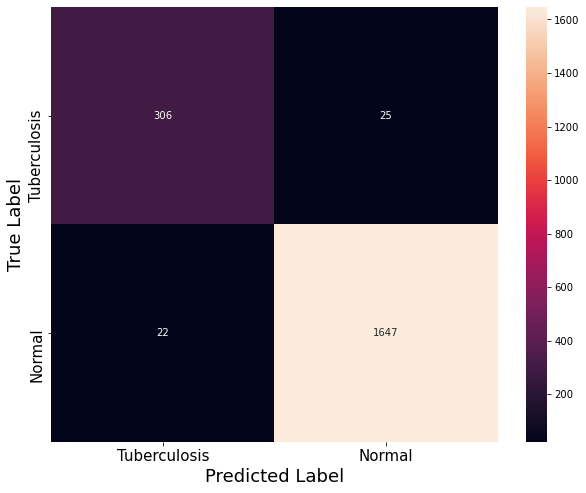

In [21]:
oes_matrix(baseline2_results)